In [4]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

batch_size = 256
n_classes = 10
epochs = 300

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

# 以上やり方はCNNタイピング参照

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


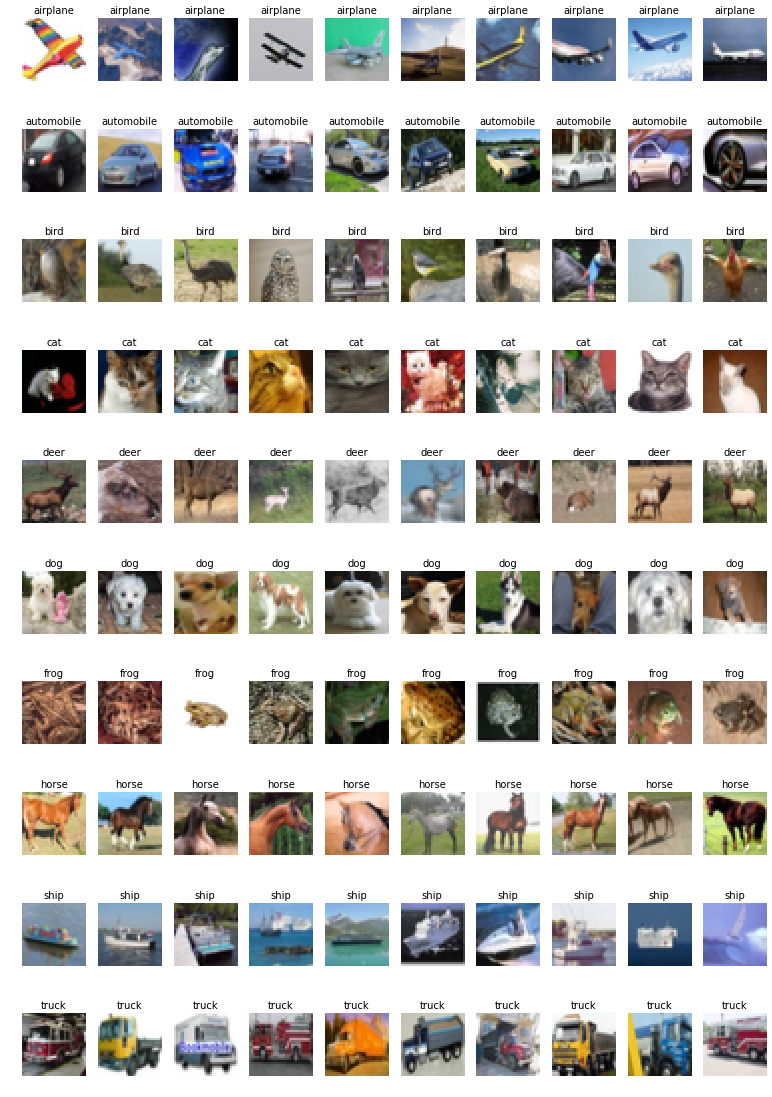

In [5]:
# パイソンで画像を表示するために使用する
from PIL.Image import fromarray as toimage
import matplotlib.pyplot as plt

pos = 1
plt.figure(figsize=(16,24), dpi=60)

# matplotlib で学習用画像を10個ずつ表示する
for targetClass in range(n_classes):
    targetIdx = []
    # クラスclassIDの画像のインデックスリストを取得
    for i in range(len(y_train)):
        if y_train[i][0] == targetClass:
            targetIdx.append(i)

    # 各クラスからランダムに選んだ最初の10個の画像を描画
    np.random.shuffle(targetIdx)
    for idx in targetIdx[:10]:
        # X_train[idx] は3次元の行列になっており、そのままだと数字の羅列が表示されるだけなので
        # toimage を使って画像に変換してから表示する
        img = toimage(x_train[idx])
        plt.subplot(10, 10, pos)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cifar10_labels[y_train[idx][0]])
        pos += 1

plt.show()

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_train.max())
print(x_test.max())

x_train /= x_train.max()
x_test /= x_test.max()

print(y_train[0])
print(y_test[0])

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

print(y_train[0])
print(y_test[0])

255.0
255.0
[6]
[3]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D, GlobalAveragePooling2D
from keras.layers.core import Activation, Flatten
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPool2D())# デフォルトで2*2
model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D())


# 下記3行ですごい重みの計算になるためGAPを使用する
# model.add(Flatten())
# model.add(Dense(4096, activation = 'relu'))
# model.add(Dense(4096, activation = 'relu'))
# model.add(Dense(4096, activation = 'relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(n_classes, activation = 'softmax'))

model.compile(optimizer = 'sgd',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

W0702 11:56:36.328362 140675529054080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 11:56:36.355049 140675529054080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 11:56:36.361590 140675529054080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 11:56:36.431119 140675529054080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0702 11:56:36.434414 140675529054080 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 512)         1180160   
__________

In [0]:
model.fit(x_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,# 途中経過を出力する（０： 出力しない 2: 詳細に出す
         validation_split = 0.2) # 20%のデータは検証用に使う
score = model.evaluate(x_test, y_test)
print('print loss =', score[0])
print('print accuracy =', score[1])

W0702 11:59:08.373975 140675529054080 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 72s 2ms/step - loss: 2.2399 - acc: 0.1638 - val_loss: 2.1967 - val_acc: 0.1613
Epoch 2/300
40000/40000 [==============================] - 55s 1ms/step - loss: 2.0731 - acc: 0.2484 - val_loss: 2.0877 - val_acc: 0.2328
Epoch 3/300
40000/40000 [==============================] - 56s 1ms/step - loss: 1.9453 - acc: 0.3036 - val_loss: 2.0154 - val_acc: 0.2854
Epoch 4/300
40000/40000 [==============================] - 56s 1ms/step - loss: 1.8278 - acc: 0.3474 - val_loss: 2.1460 - val_acc: 0.2510
Epoch 5/300
40000/40000 [==============================] - 57s 1ms/step - loss: 1.7325 - acc: 0.3825 - val_loss: 1.8060 - val_acc: 0.3376
Epoch 6/300
40000/40000 [==============================] - 57s 1ms/step - loss: 1.6487 - acc: 0.4114 - val_loss: 1.7108 - val_acc: 0.3599
Epoch 7/300
40000/40000 [==============================] - 57s 1ms/step - loss: 1.5708 - acc: 0.4432 - val_loss: 1.6508 - 